# Measurement of fitting time and query time

In this notebook different parameters and their influence to the fitting and query time of sklearn, lsh forest, minHash and annoy are examinded.

Computed on Intel i7-3770 3.4 GHz, Ubuntu Linux 14.04

In [1]:
%matplotlib inline
import time
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_sparse_uncorrelated
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LSHForest
from sklearn.random_projection import SparseRandomProjection
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
import neighborsMinHash as kneighbors
from neighborsMinHash.util import create_dataset
from neighborsMinHash.util import create_dataset_fixed_nonzero
from neighborsMinHash.util import measure_performance
from neighborsMinHash.util import plotData

import random

from scipy.sparse import dok_matrix
from scipy.sparse import rand
from scipy.sparse import vstack

import annoy

Measure the fitting time, query time and the accuracy of sklearn, lshf and minHash for the following parameters:
- seed = 6
- centroids = 8
- size_of_datasets = 7
- number_of_instances = [1000, 10000]
- number_of_features = [1000, 10000]
- density = 0.01
- fraction_of_density = 0.2
- n_neighbors_sklearn = 5
- n_neighbors_minHash = 5

In [2]:
seed = 6
centroids = 8
size_of_datasets = 7
number_of_instances = [1000, 10000]
number_of_features = [1000, 10000, 100000]
density = 0.01
fraction_of_density = 0.2
n_neighbors_sklearn = 5
n_neighbors_minHash = 5
dataset_array = []
for instances in number_of_instances:
    for features in number_of_features:
        dataset, y = create_dataset(seed=seed, number_of_centroids=centroids, number_of_instances=instances,
                                         number_of_features=features,density = density,
                                         fraction_of_density=fraction_of_density, size_of_dataset = size_of_datasets)
        dataset_array.append(dataset)

# projected_data = []
# for d in dataset_array:
#     data_projection = SparseRandomProjection(n_components=50, random_state=1)
#     projected_data.append(data_projection.fit_transform(d))

    
# returnValues = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash, dataset_dense=projected_data)
returnValues = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash, 
                                        number_of_hashfunctions=[600])
xticks = []
for i in number_of_instances:
    for j in number_of_features:
        tick = str(i)
        tick += "/"
        tick += str(j)
        xticks.append(tick)
# data, color, label, title, xticks, ylabel, number_of_instances, number_of_features,figure_size=(10,5),  bar_width=0.1,log=True
# plot query time for 50 times one query


/home/joachim/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: setting an array element with a sequence.

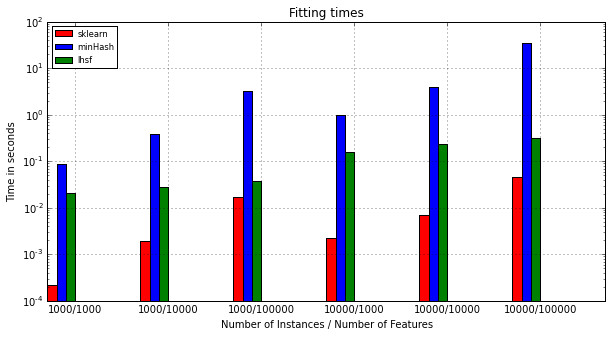

In [4]:
plotData(data=returnValues[:3], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", 
         xlabel="Number of Instances / Number of Features",
         number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Fitting times')

#### Query time for x queries in one query

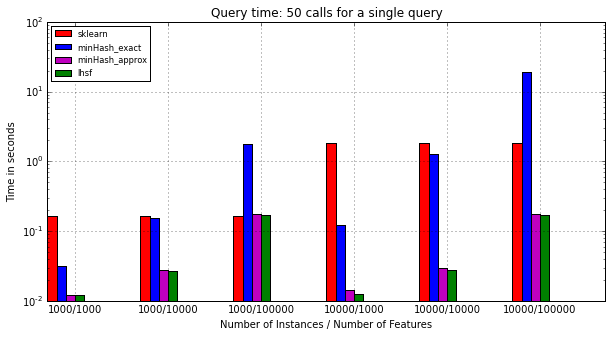

In [5]:
plotData(data=returnValues[3:7], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
         xlabel="Number of Instances / Number of Features",
        number_of_features=len(number_of_features), title='Query time: 50 calls for a single query')

#### Query time for one time x queries

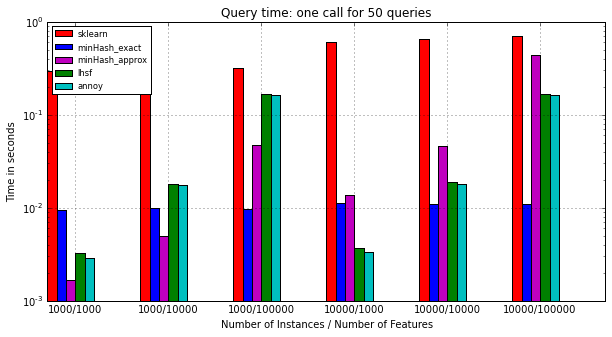

In [6]:
plotData(data=returnValues[7:13], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
         xlabel="Number of Instances / Number of Features",
        number_of_features=len(number_of_features), title='Query time: one call for 50 queries')

#### Accuracy for different datasets

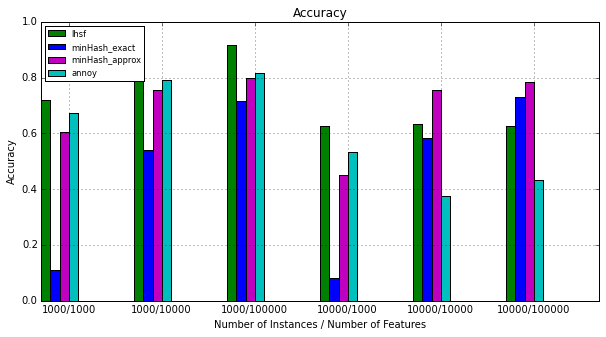

In [7]:
plotData(data=returnValues[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=xticks, ylabel="Accuracy", number_of_instances=len(number_of_instances),
         xlabel="Number of Instances / Number of Features",
        number_of_features=len(number_of_features), title='Accuracy', log=False)

## Non-zero elements are fixed

For the dataset the following parameters are used:
- seed=5
- number_of_centroids=7,
- number_of_instances=[100]
- number_of_features=[int(1e3)]
- size_of_dataset=8
- non_zero_elements=10
- fraction_of_density=0.2
                 

In [ ]:
number_of_instances = [100]
number_of_features = [int(1e3), int(1e4), int(1e5)]
dataset_array = []
for instances in number_of_instances:
    for features in number_of_features:
        dataset_fixed, y = create_dataset_fixed_nonzero(seed=5,
                   number_of_centroids=7,
                   number_of_instances=instances,
                   number_of_features=features,
                   size_of_dataset=8,
                   non_zero_elements=10,
                   fraction_of_density=0.2)
        dataset_array.append(dataset_fixed)

projected_data = []
for d in dataset_array:
    data_projection = SparseRandomProjection(n_components=800, random_state=1)
    projected_data.append(data_projection.fit_transform(d))
# returnValuesNonZero = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash, dataset_dense=projected_data)
returnValuesNonZero = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash, 
                                        number_of_hashfunctions=[600])

In [ ]:
plotData(data=returnValues[:3], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=1,
        number_of_features=4, title='Fitting times')

####Query time: 50 calls for a single query

In [ ]:
plotData(data=returnValuesNonZero[3:7], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: 50 calls for a single query')

####Query time: one call for 50 queries

In [ ]:
plotData(data=returnValuesNonZero[7:13], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: one call for 50 queries')

#### Accuracy for different datasets

In [ ]:
plotData(data=returnValuesNonZero[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=xticks, ylabel="Accuracy", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Accuracy', log=False)